In [32]:
from pymongo import MongoClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
database        = MongoClient()["scraper2"]
movements_table = database["container_movements"]

In [ ]:
select = {
    "_id": 0,
    "container": 1,
    "date": 1,
    "status": 1,
    "location": 1,
    "latitude": 1,
    "longitude": 1
}

## Maersk

In [49]:
maersk_query = {
    "container": "MRKU5264777"
}

cursor = movements.find(maersk_query, select).sort("date", 1)
maersk = list(cursor)

print(len(maersk))

9


In [50]:
maersk_df = pd.DataFrame(maersk)
maersk_df

,container,date,latitude,location,longitude,status
0,MRKU5264777,2019-02-12 18:32:00,3.002762,Cogent Container Depot (M) Sdn Bhd\nPort Klang...,101.396674,Gate out
1,MRKU5264777,2019-02-13 21:35:00,3.002762,"Westport\nPort Klang, Selangor, Malaysia",101.396674,Gate in
2,MRKU5264777,2019-02-15 01:13:00,3.002762,"Westport\nPort Klang, Selangor, Malaysia",101.396674,Load
3,MRKU5264777,2019-02-21 02:57:00,22.350627,Hongkong/Hk International Terminals\nHong Kong...,114.184916,Discharge
4,MRKU5264777,2019-02-24 15:17:00,22.350627,Hongkong/Hk International Terminals\nHong Kong...,114.184916,Gate out
5,MRKU5264777,2019-02-24 15:29:00,22.350627,"Hong Kong Modern Terminals Ltd\nHong Kong, Hon...",114.184916,Gate in
6,MRKU5264777,2019-03-05 15:51:00,22.350627,"Hong Kong Modern Terminals Ltd\nHong Kong, Hon...",114.184916,Load
7,MRKU5264777,2019-04-05 23:29:00,-12.066667,"APM Terminals in Callao Port\nCallao, Peru",-77.150000,Discharge
8,MRKU5264777,2019-04-06 14:11:00,-12.066667,"APM Terminals in Callao Port\nCallao, Peru",-77.150000,Gate out


## Hapag-Lloyd

In [51]:
hapaglloyd_query = {
    "container": "FSCU5670046"
}

cursor = movements.find(hapaglloyd_query, select).sort("date", 1)
hapaglloyd = list(cursor)

print(len(hapaglloyd))

7


In [52]:
hapag_df = pd.DataFrame(hapaglloyd)
hapag_df

,container,date,latitude,location,longitude,status
0,FSCU5670046,2019-03-12 07:33:00,51.221110,ANTWERP,4.399708,Gate out empty
1,FSCU5670046,2019-03-12 14:37:00,51.221110,ANTWERP,4.399708,Arrival in
2,FSCU5670046,2019-03-26 12:59:00,51.221110,ANTWERP,4.399708,Loaded
3,FSCU5670046,2019-03-26 21:54:00,51.221110,ANTWERP,4.399708,Vessel departed
4,FSCU5670046,2019-04-07 03:30:00,36.846292,"NORFOLK, VA",-76.292925,Vessel arrived
5,FSCU5670046,2019-04-07 09:25:00,36.846292,"NORFOLK, VA",-76.292925,Discharged
6,FSCU5670046,2019-04-09 16:49:00,36.846292,"NORFOLK, VA",-76.292925,Departure from


## Evergreen

In [53]:
evergreen_query = {
    "container": "EGSU9089973"
}

cursor = movements.find(evergreen_query, select).sort("date", 1)
evergreen = list(cursor)

print(len(evergreen))

2


In [54]:
evergreen_df = pd.DataFrame(evergreen)
evergreen_df

,container,date,latitude,location,longitude,status
0,EGSU9089973,2019-03-07,-12.066667,CALLAO (PE),-77.150000,Loaded (FCL) on vessel
1,EGSU9089973,2019-04-10,22.350627,HONG KONG (HK),114.184916,Despatched by barge


## Línea de tiempo

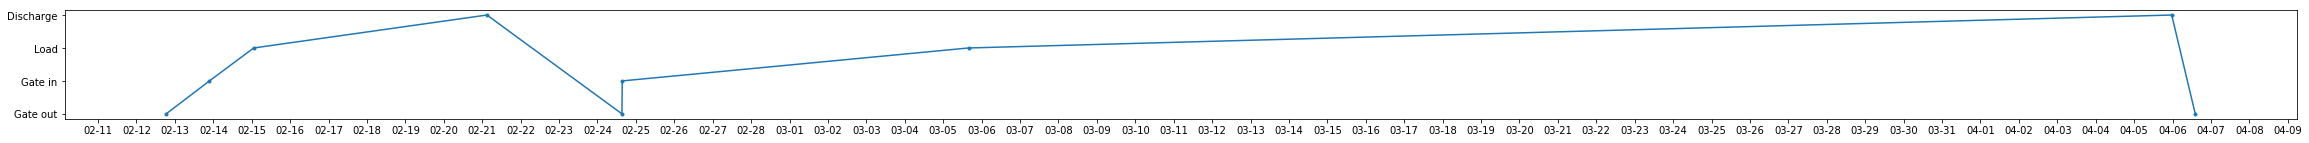

In [55]:
import matplotlib.dates as mdates

plt.figure(figsize = (40, 2))
[timeline] = plt.plot(maersk_df["date"], maersk_df["status"], marker = ".")

xaxis = timeline.axes.xaxis
xaxis.set_major_locator(mdates.DayLocator())
xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

In [14]:
# from mpl_toolkits.basemap import Basemap